### R C4.5实现——RWeka

根据`RWeka`[文档](https://www.rdocumentation.org/packages/RWeka/versions/0.4-40/topics/Weka_classifier_trees):

```
J48(formula, data, subset, na.action,
    control = Weka_control(), options = NULL)
```
`J48` generates unpruned or pruned C4.5 decision trees (Quinlan, 1993).

具体调用的API：

Arguments：

formula

    a symbolic description of the model to be fit.
data

    an optional data frame containing the variables in the model.
subset

    an optional vector specifying a subset of observations to be used in the fitting process.
na.action

    a function which indicates what should happen when the data contain NAs. See model.frame for details.
control

    an object of class Weka_control giving options to be passed to the Weka learner. Available options can be obtained on-line using the Weka Option Wizard WOW, or the Weka documentation.

options

    a named list of further options, or NULL (default). See Details.


如上述，这里对剪枝的控制的是通过对`control`参数指定`Weka_control`来实现的。具体，运行`WOW("J48")`得到：
```
-U      Use unpruned tree.
-O      Do not collapse tree.
-C <pruning confidence>
        Set confidence threshold for pruning.  (default 0.25)
	Number of arguments: 1.
-M <minimum number of instances>
        Set minimum number of instances per leaf.  (default 2)
	Number of arguments: 1.
-R      Use reduced error pruning.
-N <number of folds>
        Set number of folds for reduced error pruning. One fold is used
        as pruning set.  (default 3)
	Number of arguments: 1.
-B      Use binary splits only.
-S      Do not perform subtree raising.
-L      Do not clean up after the tree has been built.
-A      Laplace smoothing for predicted probabilities.
-J      Do not use MDL correction for info gain on numeric attributes.
-Q <seed>
        Seed for random data shuffling (default 1).
	Number of arguments: 1.
-doNotMakeSplitPointActualValue
        Do not make split point actual value.
-output-debug-info
        If set, classifier is run in debug mode and may output
        additional info to the console
-do-not-check-capabilities
        If set, classifier capabilities are not checked before
        classifier is built (use with caution).
-num-decimal-places
        The number of decimal places for the output of numbers in the
        model (default 2).
	Number of arguments: 1.
-batch-size
        The desired batch size for batch prediction (default 100).
	Number of arguments: 1.
```

In [1]:
# R=TRUE
library(RWeka)
## Learn J4.8 tree with reduced error pruning (-R) and 
## minimum number of instances set to 5 (-M 5):
m1 <- J48(Species ~ ., data = iris, control = Weka_control(R = TRUE, M = 5))
m1

ERROR: Error in library(RWeka): there is no package called ‘RWeka’


In [9]:
summary(m1) # calls evaluate_Weka_classifier()


=== Summary ===

Correctly Classified Instances         142               94.6667 %
Incorrectly Classified Instances         8                5.3333 %
Kappa statistic                          0.92  
Mean absolute error                      0.0524
Root mean squared error                  0.182 
Relative absolute error                 11.7831 %
Root relative squared error             38.6033 %
Total Number of Instances              150     

=== Confusion Matrix ===

  a  b  c   <-- classified as
 50  0  0 |  a = setosa
  0 45  5 |  b = versicolor
  0  3 47 |  c = virginica

In [10]:
# 也可以自己生成Confusion Matrix
table(iris$Species, predict(m1))

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         45         5
  virginica       0          3        47

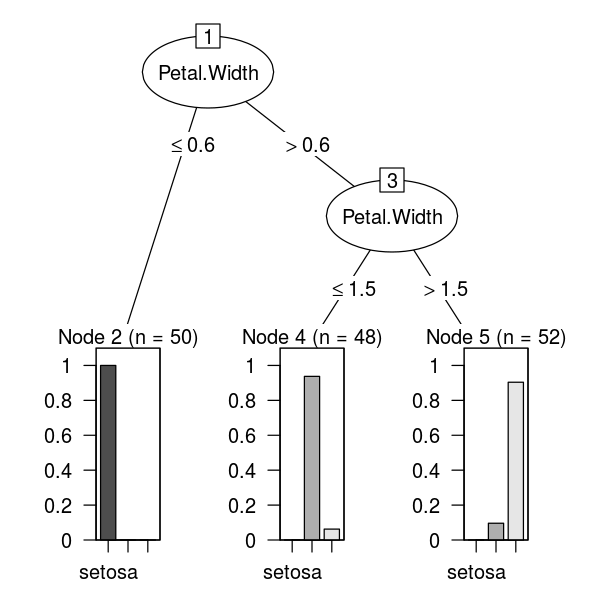

In [16]:
options(repr.plot.width=5, repr.plot.height=5)  # plot size
plot(m1)

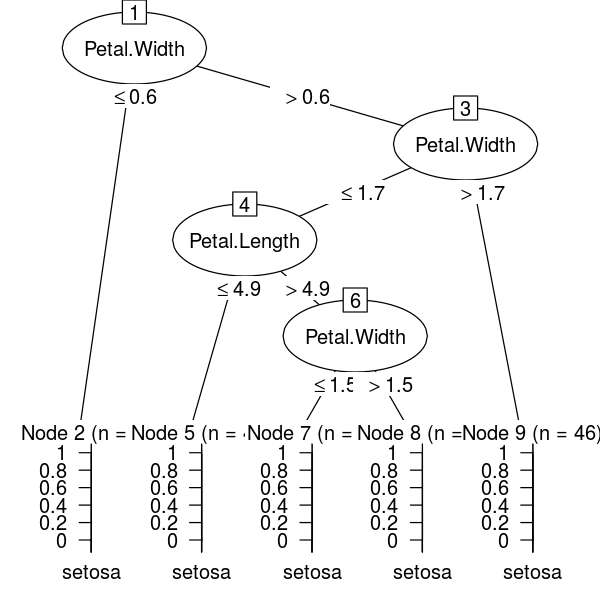

In [19]:
# 也可以控制算法不进行剪枝
# 显然此时得到的决策树会复杂一些
m2 <- J48(Species ~ ., data = iris, control = Weka_control(U=TRUE))
plot(m2)